Daniel Conrado Monroy Madrid - 16012674

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
label_dict={
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [21]:
dict_label={3:"Dress", 6:"Shirt", 7:"Sneaker"} #3 labels a utilizar

In [4]:
train_filtro=(train_labels==3)|(train_labels==6)|(train_labels==7)   #Se filtra la data para escoger 3 piezas.
test_filtro=(test_labels==3)|(test_labels==6)|(test_labels==7)

In [5]:
x_train=train_images[train_filtro]
x_test=test_images[test_filtro]
y_train=train_labels[train_filtro]
y_test=test_labels[test_filtro]

In [7]:
with tf.Session() as sess:     #one hot encoding para labels
    y_train1=sess.run(tf.one_hot(y_train, 10))
    y_test1=sess.run(tf.one_hot(y_test, 10))

In [8]:
x_train1 = x_train/255
x_test1 = x_test/255

In [9]:
x_train1=x_train1.reshape(18000, 28 * 28)  #datos normalizados
x_test1=x_test1.reshape(3000, 28 * 28)

In [11]:
x_train2=x_train.reshape(18000, 28 * 28)   #datos no normalizados (raw data)
x_test2=x_test.reshape(3000, 28 * 28)

In [12]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(18000, 784)
(3000, 784)
(18000, 10)
(3000, 10)


In [13]:
print(x_train2.shape)
print(x_test2.shape)

(18000, 784)
(3000, 784)


In [51]:
learning_rate = 0.00001     #hiperparámetros
epochs = 35
batch_size = 32
batches = int(x_train.shape[0] / batch_size)

In [17]:
tf.reset_default_graph()
grafo=tf.Graph()
with grafo.as_default():
    with tf.name_scope("placeholders"):
        X=tf.placeholder(tf.float32, [None, 784])
        Y=tf.placeholder(tf.float32, [None, 10])
    
    with tf.name_scope("variables"):
        W=tf.Variable(tf.zeros([784, 10]))
        b=tf.Variable(tf.zeros([10]))
    
    with tf.name_scope("predict"):
        predict=tf.nn.softmax(tf.add(tf.matmul(X, W), b))

    with tf.name_scope("costo"):
        cost=tf.reduce_mean(-tf.reduce_sum(Y * tf.log(predict), axis=1))

    with tf.name_scope("gradient_descent"):
        optimizador=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) 
    
    with tf.name_scope("error_summary"):
        cost_summary=tf.summary.scalar("Cost",cost)        

Instructions for updating:
Use tf.cast instead.


In [52]:
def train_xnorm(n):
    with tf.Session(graph=grafo) as session:
        
        session.run(tf.global_variables_initializer())
        writer=tf.summary.FileWriter('./logistic1',session.graph)
    
        for epoch in range(epochs):
            
            for i in range(batches):
                
                offset=i * epoch
                x=x_train1[offset: offset + batch_size]
                y=y_train1[offset: offset + batch_size]
                session.run(optimizador, feed_dict={X: x, Y:y})
                costo=session.run(cost, feed_dict={X:x, Y:y})
                cost_in_each_epoch = 0
                cost_in_each_epoch += costo
                summary_epoch=session.run(cost_summary,feed_dict={X:x_train1,Y:y_train1}) 
                writer.add_summary(summary_epoch,epoch)
        
            if not epoch % 3:
                print("Epoch: {}".format(epoch + 1), "costo={}".format(cost_in_each_epoch))
            
        correct_predict=tf.equal(tf.argmax(predict, 1), tf.argmax(Y, 1))
        accuracy=tf.reduce_mean(tf.cast(correct_predict, tf.float32))
        acc=accuracy.eval({X: x_test1, Y: y_test1})
        print(f'Accuracy: {acc * 100:.2f}%')
    
        respuesta=np.argmax(session.run(predict, feed_dict={X: x_train1[:n]}))
        titulo=dict_label[np.argmax(session.run(predict,feed_dict={X:x_train1[:n]}))]
        print(titulo)
           
    

In [53]:
train_xnorm(1)

Epoch: 1 costo=2.1038591861724854
Epoch: 4 costo=1.81746244430542
Epoch: 7 costo=1.4683411121368408
Epoch: 10 costo=1.3239575624465942
Epoch: 13 costo=1.234371542930603
Epoch: 16 costo=1.0198179483413696
Epoch: 19 costo=0.9850172400474548
Epoch: 22 costo=0.8796058893203735
Epoch: 25 costo=0.912035346031189
Epoch: 28 costo=0.7968844175338745
Epoch: 31 costo=0.8388209342956543
Epoch: 34 costo=nan
Accuracy: 91.87%
Dress


In [54]:
def train_xnorm_imagen(n):
    with tf.Session(graph=grafo) as session:
        
        session.run(tf.global_variables_initializer())
        writer=tf.summary.FileWriter('./logistic2',session.graph)
    
        for epoch in range(epochs):
            
            for i in range(batches):
                
                offset=i * epoch
                x=x_train1[offset: offset + batch_size]
                y=y_train1[offset: offset + batch_size]
                session.run(optimizador, feed_dict={X: x, Y:y})
                costo=session.run(cost, feed_dict={X:x, Y:y})
                cost_in_each_epoch = 0
                cost_in_each_epoch += costo
                summary_epoch=session.run(cost_summary,feed_dict={X:x_train1,Y:y_train1}) 
                writer.add_summary(summary_epoch,epoch)
        
            if not epoch % 3:
                print("Epoch: {}".format(epoch + 1), "costo={}".format(cost_in_each_epoch))
            
        correct_predict=tf.equal(tf.argmax(predict, 1), tf.argmax(Y, 1))
        accuracy=tf.reduce_mean(tf.cast(correct_predict, tf.float32))
        acc=accuracy.eval({X: x_test1, Y: y_test1})
        print(f'Accuracy: {acc * 100:.2f}%')
    
        fig, axes = plt.subplots(1, 10, figsize=(20, 20))
        for img, ax in zip(x_train1[:n], axes):
            respuesta_final=np.argmax(session.run(predict, feed_dict={X: [img]}))
            titulo_imagen=dict_label[np.argmax(session.run(predict,feed_dict={X:[img]}))]
            ax.set_title(titulo_imagen)
            ax.imshow(img.reshape((28, 28)))
            ax.axis('off')
        

Epoch: 1 costo=2.1038591861724854
Epoch: 4 costo=1.81746244430542
Epoch: 7 costo=1.4683411121368408
Epoch: 10 costo=1.3239575624465942
Epoch: 13 costo=1.234371542930603
Epoch: 16 costo=1.0198179483413696
Epoch: 19 costo=0.9850172400474548
Epoch: 22 costo=0.8796058893203735
Epoch: 25 costo=0.912035346031189
Epoch: 28 costo=0.7968844175338745
Epoch: 31 costo=0.8388209342956543
Epoch: 34 costo=nan
Accuracy: 91.87%


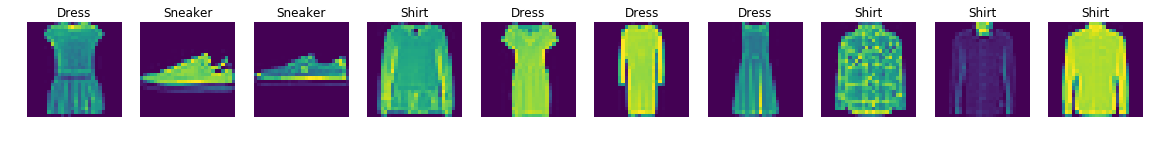

In [55]:
train_xnorm_imagen(10)

## Curva de error y grafo del modelo en Tensorboard

In [61]:
import imageio as imio

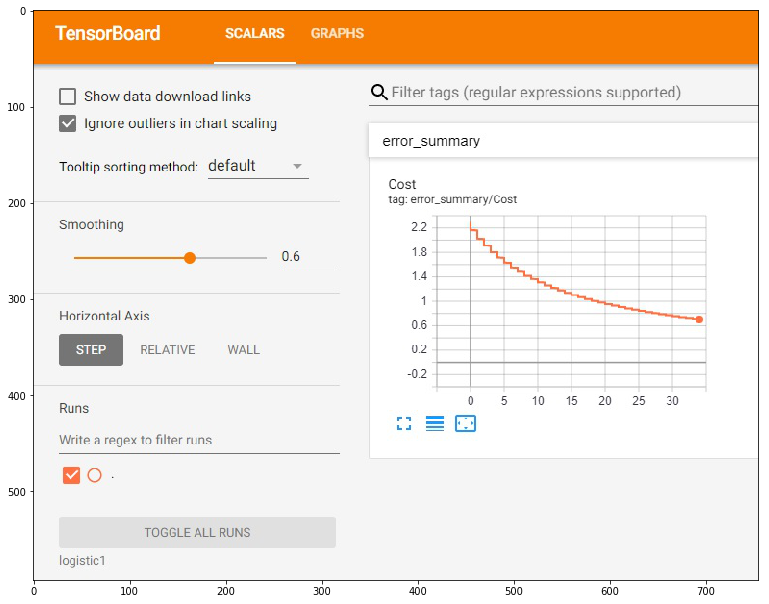

In [62]:
imagen=imio.imread('./error.jpg')
plt.figure(figsize=(13,13))
plt.imshow(imagen)

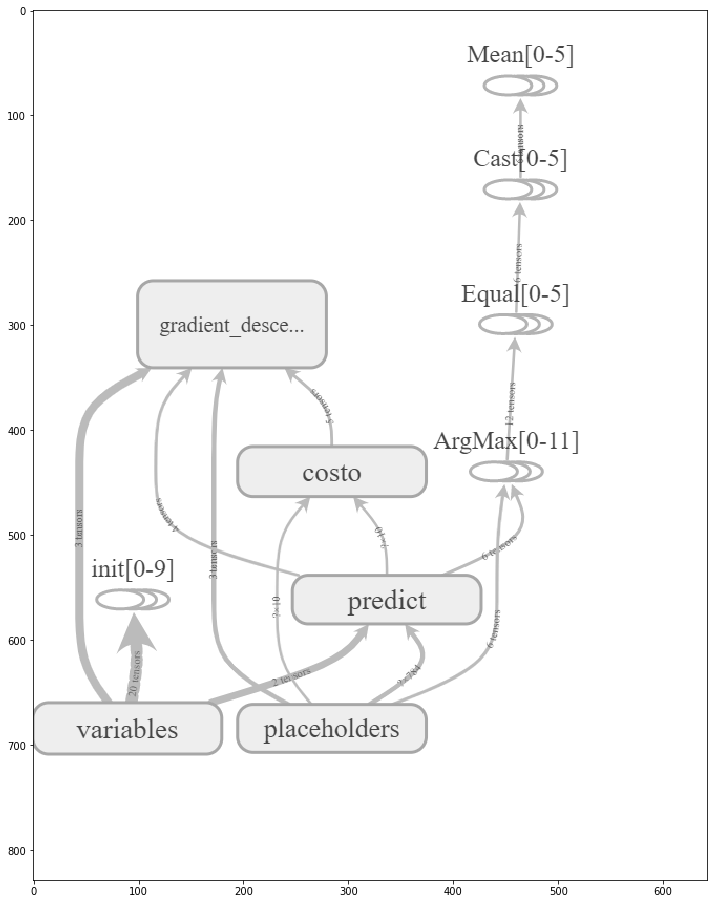

In [64]:
grafo=imio.imread('./graforl.png')
plt.figure(figsize=(16,16))
plt.imshow(grafo)

In [56]:
def train_xraw(n):
    with tf.Session(graph=grafo) as session:
        
        session.run(tf.global_variables_initializer())
        writer=tf.summary.FileWriter('./logistic3',session.graph)
    
        for epoch in range(epochs):
            
            for i in range(batches):
                
                offset=i * epoch
                x=x_train2[offset: offset + batch_size]
                y=y_train1[offset: offset + batch_size]
                session.run(optimizador, feed_dict={X: x, Y:y})
                costo=session.run(cost, feed_dict={X:x, Y:y})
                cost_in_each_epoch = 0
                cost_in_each_epoch += costo
                summary_epoch=session.run(cost_summary,feed_dict={X:x_train2,Y:y_train1}) 
                writer.add_summary(summary_epoch,epoch)
        
            if not epoch % 3:
                print("Epoch: {}".format(epoch + 1), "costo={}".format(cost_in_each_epoch))
            
        correct_predict=tf.equal(tf.argmax(predict, 1), tf.argmax(Y, 1))
        accuracy=tf.reduce_mean(tf.cast(correct_predict, tf.float32))
        acc=accuracy.eval({X: x_test2, Y: y_test1})
        print(f'Accuracy: {acc * 100:.2f}%')
    
        respuesta=np.argmax(session.run(predict, feed_dict={X: x_train2[:n]}))
        titulo=dict_label[np.argmax(session.run(predict,feed_dict={X:x_train2[:n]}))]
        print(titulo)

In [60]:
def train_xraw_imagen(n):
    with tf.Session(graph=grafo) as session:
        
        session.run(tf.global_variables_initializer())
        writer=tf.summary.FileWriter('./logistic4',session.graph)
    
        for epoch in range(epochs):
            
            for i in range(batches):
                
                offset=i * epoch
                x=x_train2[offset: offset + batch_size]
                y=y_train1[offset: offset + batch_size]
                session.run(optimizador, feed_dict={X: x, Y:y})
                costo=session.run(cost, feed_dict={X:x, Y:y})
                cost_in_each_epoch = 0
                cost_in_each_epoch += costo
                summary_epoch=session.run(cost_summary,feed_dict={X:x_train2,Y:y_train1}) 
                writer.add_summary(summary_epoch,epoch)
        
            if not epoch % 3:
                print("Epoch: {}".format(epoch + 1), "costo={}".format(cost_in_each_epoch))
            
        correct_predict=tf.equal(tf.argmax(predict, 1), tf.argmax(Y, 1))
        accuracy=tf.reduce_mean(tf.cast(correct_predict, tf.float32))
        acc=accuracy.eval({X: x_test2, Y: y_test1})
        print(f'Accuracy: {acc * 100:.2f}%')
    
        fig, axes = plt.subplots(1, 10, figsize=(20, 20))
        for img, ax in zip(x_train2[:n], axes):
            respuesta_final=np.argmax(session.run(predict, feed_dict={X: [img]}))
            titulo_imagen=dict_label[np.argmax(session.run(predict,feed_dict={X:[img]}))]
            ax.set_title(titulo_imagen)
            ax.imshow(img.reshape((28, 28)))
            ax.axis('off')